<a href="https://colab.research.google.com/github/amiralo01/Python_Lessons/blob/main/Python_programming_lessons/Atvd_ZeroFun%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade de Cálculo numérico - Zero funções**

Instalação das bibliotecas:

In [1]:
!pip install sympy
!pip3 install prettytable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




*   A biblioteca "**prettytable**" permite a criação de tabelas elegantes e personalizadas a partir de dados em listas ou outras estruturas de dados.
*   Já o "**sympy**" é uma biblioteca Python de matemática simbólica que fornece ferramentas para realizar cálculos simbólicos, como integração, diferenciação, simplificação de expressões e solução de equações.



**Preparação do ambiente**

1.   O comando from "**math import** *" é usado para importar todas as funções do módulo math, que fornece funções matemáticas básicas como sin(), cos(), tan(), sqrt(), log(), entre outras
2.   O comando from "**prettytable import PrettyTable**" é usado para importar a classe PrettyTable do pacote prettytable, permitindo que o programador crie tabelas elegantes e personalizadas a partir de dados em listas ou outras estruturas de dados.

In [6]:
from math import *
from prettytable import PrettyTable

def ler_formula(message):
    formula_Correta = False
    formula = ""
    x = 1
    while not formula_Correta:
        try:
            formula = input(message)
            eval(formula)
            formula_Correta = True
        except:
            print("Está forma não é valida")
    return formula

def criar_tabela(header, list):
    table = PrettyTable(header)
    table.align = 'l'
    for row in list:
        table.add_row(row)
    print(table)

def criar_tabelasGerais(bisseccao_resultado, newton_resultado, secante_resultado, fixedpoint_resultado):
    table = PrettyTable(["", "Bissecção", "Newton", "Secante", "MPF"])
    table.align = 'l'

    # Dados iniciais:
    table.add_row(["Dados Iniciais", bisseccao_resultado["label"], newton_resultado["label"], secante_resultado["label"], fixedpoint_resultado["label"]])
    #x:
    table.add_row(["x̅", bisseccao_resultado["x"], newton_resultado["x"], secante_resultado["x"], fixedpoint_resultado["x"]])
    #f(x):
    table.add_row(["f(x̅)", bisseccao_resultado["fx"], newton_resultado["fx"], secante_resultado["fx"], fixedpoint_resultado["fx"]])
    #Iterações:
    table.add_row(["Iterações", bisseccao_resultado["iter"], newton_resultado["iter"], secante_resultado["iter"], fixedpoint_resultado["iter"]])
    print(table)

# **Método da Bisseção**:

In [15]:
from math import *

def f(x):
    return eval(formula)

def bisection(a, b, tol):
    lbl = "[" + str(a) + ", " + str(b) + "]"
    iter = 0 
    initial_x = 0.5 * (a + b)
    error = float('inf')
    header = ["Iteração", "X", "F(x)", "Error"]  # Cabeçalho
    list = [[0, initial_x, f(initial_x), error]]

    while error > tol:
        
        if f(a) * f(initial_x) < 0:
            b = initial_x
        else:
            a = initial_x

        x0 = initial_x
        initial_x = 0.5 * (a + b)
        error = abs(initial_x - x0)

        iter += 1
        list.append([iter, initial_x, f(initial_x), error])

    if(error > tol):
      print("Não é possível realizar a converssão")
      initial_x = None
    else:
      criar_tabela(header, list)

    return {"x": round(initial_x, 4), "fx": round(f(initial_x), 4), "iter": iter, "list": list, "label": lbl}

# **Método de Newton**:

In [19]:
from math import *
from sympy import *

def f(x):
    return eval(formula_fx)

def df(x):
    return eval(formula_dx)

def newton(x0, tol, maxiter):
    lbl = "x0 = " + str(x0)
    iter = 0
    error = float('inf')
    header = ["Iteração", "X", "F(x)", "Error"] 
    list = [[0, x0, f(x0), error]]

    while error > tol and iter < maxiter:
        iter += 1 
        dx = -f(x0) / df(x0)  
        initial_x = x0 + dx  
        error = abs(initial_x-x0)  
        x0 = initial_x  
        list.append([iter, initial_x, f(initial_x), error])  

    if(error > tol):
        print("Não é possível realizar a converssão")
        initial_x = None
    else:
      criar_tabela(header, list)

    return {"x": round(initial_x, 4), "fx": round(f(initial_x), 4), "iter": iter, "list": list, "label": lbl}

# **Método da Secante**:

In [24]:
from math import *

def f(x):
    return eval(formula)

def secante(x0, x1, tolerancia, max_iter):
    lbl = "x0 = " + str(x0) + "; x1 = " + str(x1)
    cont = 0  
    r1 = x0  
    rn = x1  
    error = float('inf')  
    header = ["Iteração", "X", "F(x)", "Error"]  
    list = [[0, x0, f(x0), error], [1, x1, f(x1), error]]  

    while error > tolerancia and cont < max_iter:
        r2 = r1
        r1 = rn
        rn = r1 - ((f(r1)*(r2-r1)) / (f(r2) - f(r1)))  
        error = abs(rn - r1) / abs(rn)  
        cont += 1  
        list.append([cont+1, rn, f(rn), error]) 

    if(error > tolerancia):
      print("Não é possível realizar a converssão")
      initial_x = None
    else:
      criar_tabela(header, list)
      initial_x = rn

    return {"x": round(initial_x, 4), "fx": round(f(initial_x), 4), "iter": cont, "list": list, "label": lbl}

# **Método do ponto fixo**:

In [10]:
from math import *

def g(x):
    return eval(formulade_x_evidencia)

def f(x):
    return eval(formula)

def fixedpoint(x0, tol, maxiter):
    lbl = "x0 = " + str(x0)
    iter = 0  
    error = float('inf')  
    header = ["Iteração", "X", "F(x)", "Error"]  
    list = [[0, x0, f(x0), error]]  

    while error > tol and iter < maxiter:
        try:
            iter += 1  
            x_atual = g(x0)  
            error = abs(x_atual - x0)  
            x0 = x_atual  
            list.append([iter, x_atual, f(x_atual), error])  
        except:
            break

    if error > tol:
        print("Não foi possível convergir")
        atual_x = None
    else:
        criar_tabela(header, list)

    return {"x": round(x_atual, 4), "fx": round(f(x_atual), 4), "iter": iter, "list": list, "label": lbl}

# **Funções necessárias para cada método**:

**Função 1** - Definição de valores
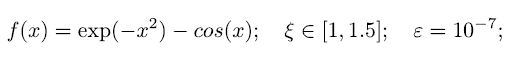

In [26]:
formula = formula_fx = 'e**-x**2-cos(x)'
formulade_x_evidencia = 'x-(exp(-x**2)-cos(x))' #'sqrt(-log(e, cos(x)))'
formula_dx = 'sin(x) - 2*x*log(e)/e**(x**2)'
tolerancia = 1e-7
maxiter = 1000

print("\nBisseção")
bis_res = bisection (1  , 1.5, tolerancia)

print("\nNewton")
new_res = newton    (1.5,      tolerancia, maxiter)

print("\nSecante")
sec_res = secante   (1  , 1.5, tolerancia, maxiter)

print("\nPonto Fixo")
mpf_res = fixedpoint(1.5,      tolerancia, maxiter)

print("\nTabela Comparativa")
criar_tabelasGerais(bis_res, new_res, sec_res, mpf_res)


Bisseção
+----------+--------------------+-------------------------+------------------------+
| Iteração | X                  | F(x)                    | Error                  |
+----------+--------------------+-------------------------+------------------------+
| 0        | 1.25               | -0.10571097524417084    | inf                    |
| 1        | 1.375              | -0.04357028953307257    | 0.125                  |
| 2        | 1.4375             | -0.0062618667706374476  | 0.0625                 |
| 3        | 1.46875            | 0.01377610211517974     | 0.03125                |
| 4        | 1.453125           | 0.003647539991477919    | 0.015625               |
| 5        | 1.4453125          | -0.0013349986384428858  | 0.0078125              |
| 6        | 1.44921875         | 0.001149366628583559    | 0.00390625             |
| 7        | 1.447265625        | -9.454888421209229e-05  | 0.001953125            |
| 8        | 1.4482421875       | 0.0005269765094347567

**Função 2** - Definição de valores
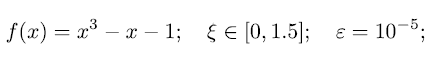

In [27]:
formula = formula_fx = 'x**3-x-1'
formulade_x_evidencia = '(x+1)**(1/3)'
formula_dx = '3*x**2-1'
tolerancia = 1e-5
maxiter = 1000

print("\nBisseção")
bis_res = bisection (0  , 1.5, tolerancia)

print("\nNewton")
new_res = newton    (0,      tolerancia, maxiter)

print("\nSecante")
sec_res = secante   (0  , 0.5, tolerancia, maxiter)

print("\nPonto Fixo")
mpf_res = fixedpoint(0.5,      tolerancia, maxiter)

print("\nTabela Comparativa")
criar_tabelasGerais(bis_res, new_res, sec_res, mpf_res)

Algoritmo de Bisseção
+----------+--------------------+-------------------------+---------------------+
| Iteração | X                  | F(x)                    | Error               |
+----------+--------------------+-------------------------+---------------------+
| 0        | 0.75               | -1.328125               | inf                 |
| 1        | 1.125              | -0.701171875            | 0.375               |
| 2        | 1.3125             | -0.051513671875         | 0.1875              |
| 3        | 1.40625            | 0.374664306640625       | 0.09375             |
| 4        | 1.359375           | 0.15261459350585938     | 0.046875            |
| 5        | 1.3359375          | 0.04834890365600586     | 0.0234375           |
| 6        | 1.32421875         | -0.0021279454231262207  | 0.01171875          |
| 7        | 1.330078125        | 0.02297348529100418     | 0.005859375         |
| 8        | 1.3271484375       | 0.010388596914708614    | 0.0029296875    

**Função 3** - Definição de valores
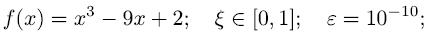

In [28]:
formula = formula_fx = 'x**3-9*x+2'
formula_x_evidence = 'x+0.1*(x**3-9*x+2)'
formula_dx = '3*x**2-9'
tolerancia = 1e-5
maxiter = 1000

print("\nBisseção")
bis_res = bisection (0  , 1, tolerancia)

print("\nNewton")
new_res = newton    (0,      tolerancia, maxiter)

print("\nSecante")
sec_res = secante   (-0.5  , 0, tolerancia, maxiter)

print("\nPonto Fixo")
mpf_res = fixedpoint(0,      tolerancia, 10)

print("\nTabela Comparativa")
criar_tabelasGerais(bis_res, new_res, sec_res, mpf_res)


Bisseção
+----------+---------------------+-------------------------+-------------------+
| Iteração | X                   | F(x)                    | Error             |
+----------+---------------------+-------------------------+-------------------+
| 0        | 0.5                 | -2.375                  | inf               |
| 1        | 0.25                | -0.234375               | 0.25              |
| 2        | 0.125               | 0.876953125             | 0.125             |
| 3        | 0.1875              | 0.319091796875          | 0.0625            |
| 4        | 0.21875             | 0.041717529296875       | 0.03125           |
| 5        | 0.234375            | -0.09650039672851562    | 0.015625          |
| 6        | 0.2265625           | -0.027432918548583984   | 0.0078125         |
| 7        | 0.22265625          | 0.007132112979888916    | 0.00390625        |
| 8        | 0.224609375         | -0.010152973234653473   | 0.001953125       |
| 9        | 0.223